In [1]:
# PART III: DATA PREPARATION

# Import any necessary libraries & packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


# Load dataset into pandas data frame using read_csv command
df = pd.read_csv(r'C:\Users\ashle\Downloads\churn_clean.csv', keep_default_na=False)

In [2]:
# Explore the dataset in order to determine how to evaluate the input data by using the head() command
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
# Rename the survey columns to describe the variables better
df.rename(columns= {'Item1': 'Responses',
                    'Item2': 'Fixes',
                    'Item3': 'Replacements',
                    'Item4': 'Reliability',
                    'Item5': 'Options',
                    'Item6': 'Respectfulness',
                    'Item7': 'Courteous',
                    'Item8': 'Listening'}, 
          inplace=True)

# Print column names to check corrections made
print(df.columns)

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Responses', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'],
      dtype='object')


In [4]:
# Calculate total null values and total duplicate values in the dataset
total_nulls = df.isna().sum().sum()
total_dupes = df.duplicated().sum()

print(f"Total Nulls: {total_nulls}\nTotal Duplicate Records: {total_dupes}")

Total Nulls: 0
Total Duplicate Records: 0


In [5]:
# Drop columns that are unnecessary for the analysis
to_drop = ['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip',
           'Lat','Lng','Population','Area','TimeZone','Job','Age','Marital','Gender','PaperlessBilling',
           'PaymentMethod']
df.drop(columns=to_drop,inplace=True)

df.head()

,Children,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,0,28561.99,No,7.978323,10,0,1,No,One year,Yes,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,1,21704.77,Yes,11.699080,12,0,1,Yes,Month-to-month,No,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,4,9609.57,No,10.752800,9,0,1,Yes,Two Year,Yes,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,1,18925.23,No,14.913540,15,2,0,Yes,Two Year,No,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,0,40074.19,Yes,8.147417,16,2,1,No,Month-to-month,Yes,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [6]:
# Find the summary statistics for numerical variables
df.describe()

,Children,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [7]:
# Create a list of the categorical variables
cat_cols = ['Churn','Techie','Contract','Port_modem','Tablet',
            'InternetService','Phone','Multiple','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

# Find the summary statistics for categorical variables            
print('PROPORTION OF EACH CATEGORICAL VARIABLE')
for col in cat_cols:
    freq = df[col].value_counts(normalize=True).reset_index()
    freq.columns = [f'{col}','Proportion']
    print('-'*40+'\n',freq)

PROPORTION OF EACH CATEGORICAL VARIABLE
----------------------------------------
   Churn  Proportion
0    No       0.735
1   Yes       0.265
----------------------------------------
   Techie  Proportion
0     No      0.8321
1    Yes      0.1679
----------------------------------------
          Contract  Proportion
0  Month-to-month      0.5456
1        Two Year      0.2442
2        One year      0.2102
----------------------------------------
   Port_modem  Proportion
0         No      0.5166
1        Yes      0.4834
----------------------------------------
   Tablet  Proportion
0     No      0.7009
1    Yes      0.2991
----------------------------------------
   InternetService  Proportion
0     Fiber Optic      0.4408
1             DSL      0.3463
2            None      0.2129
----------------------------------------
   Phone  Proportion
0   Yes      0.9067
1    No      0.0933
----------------------------------------
   Multiple  Proportion
0       No      0.5392
1      Yes      0

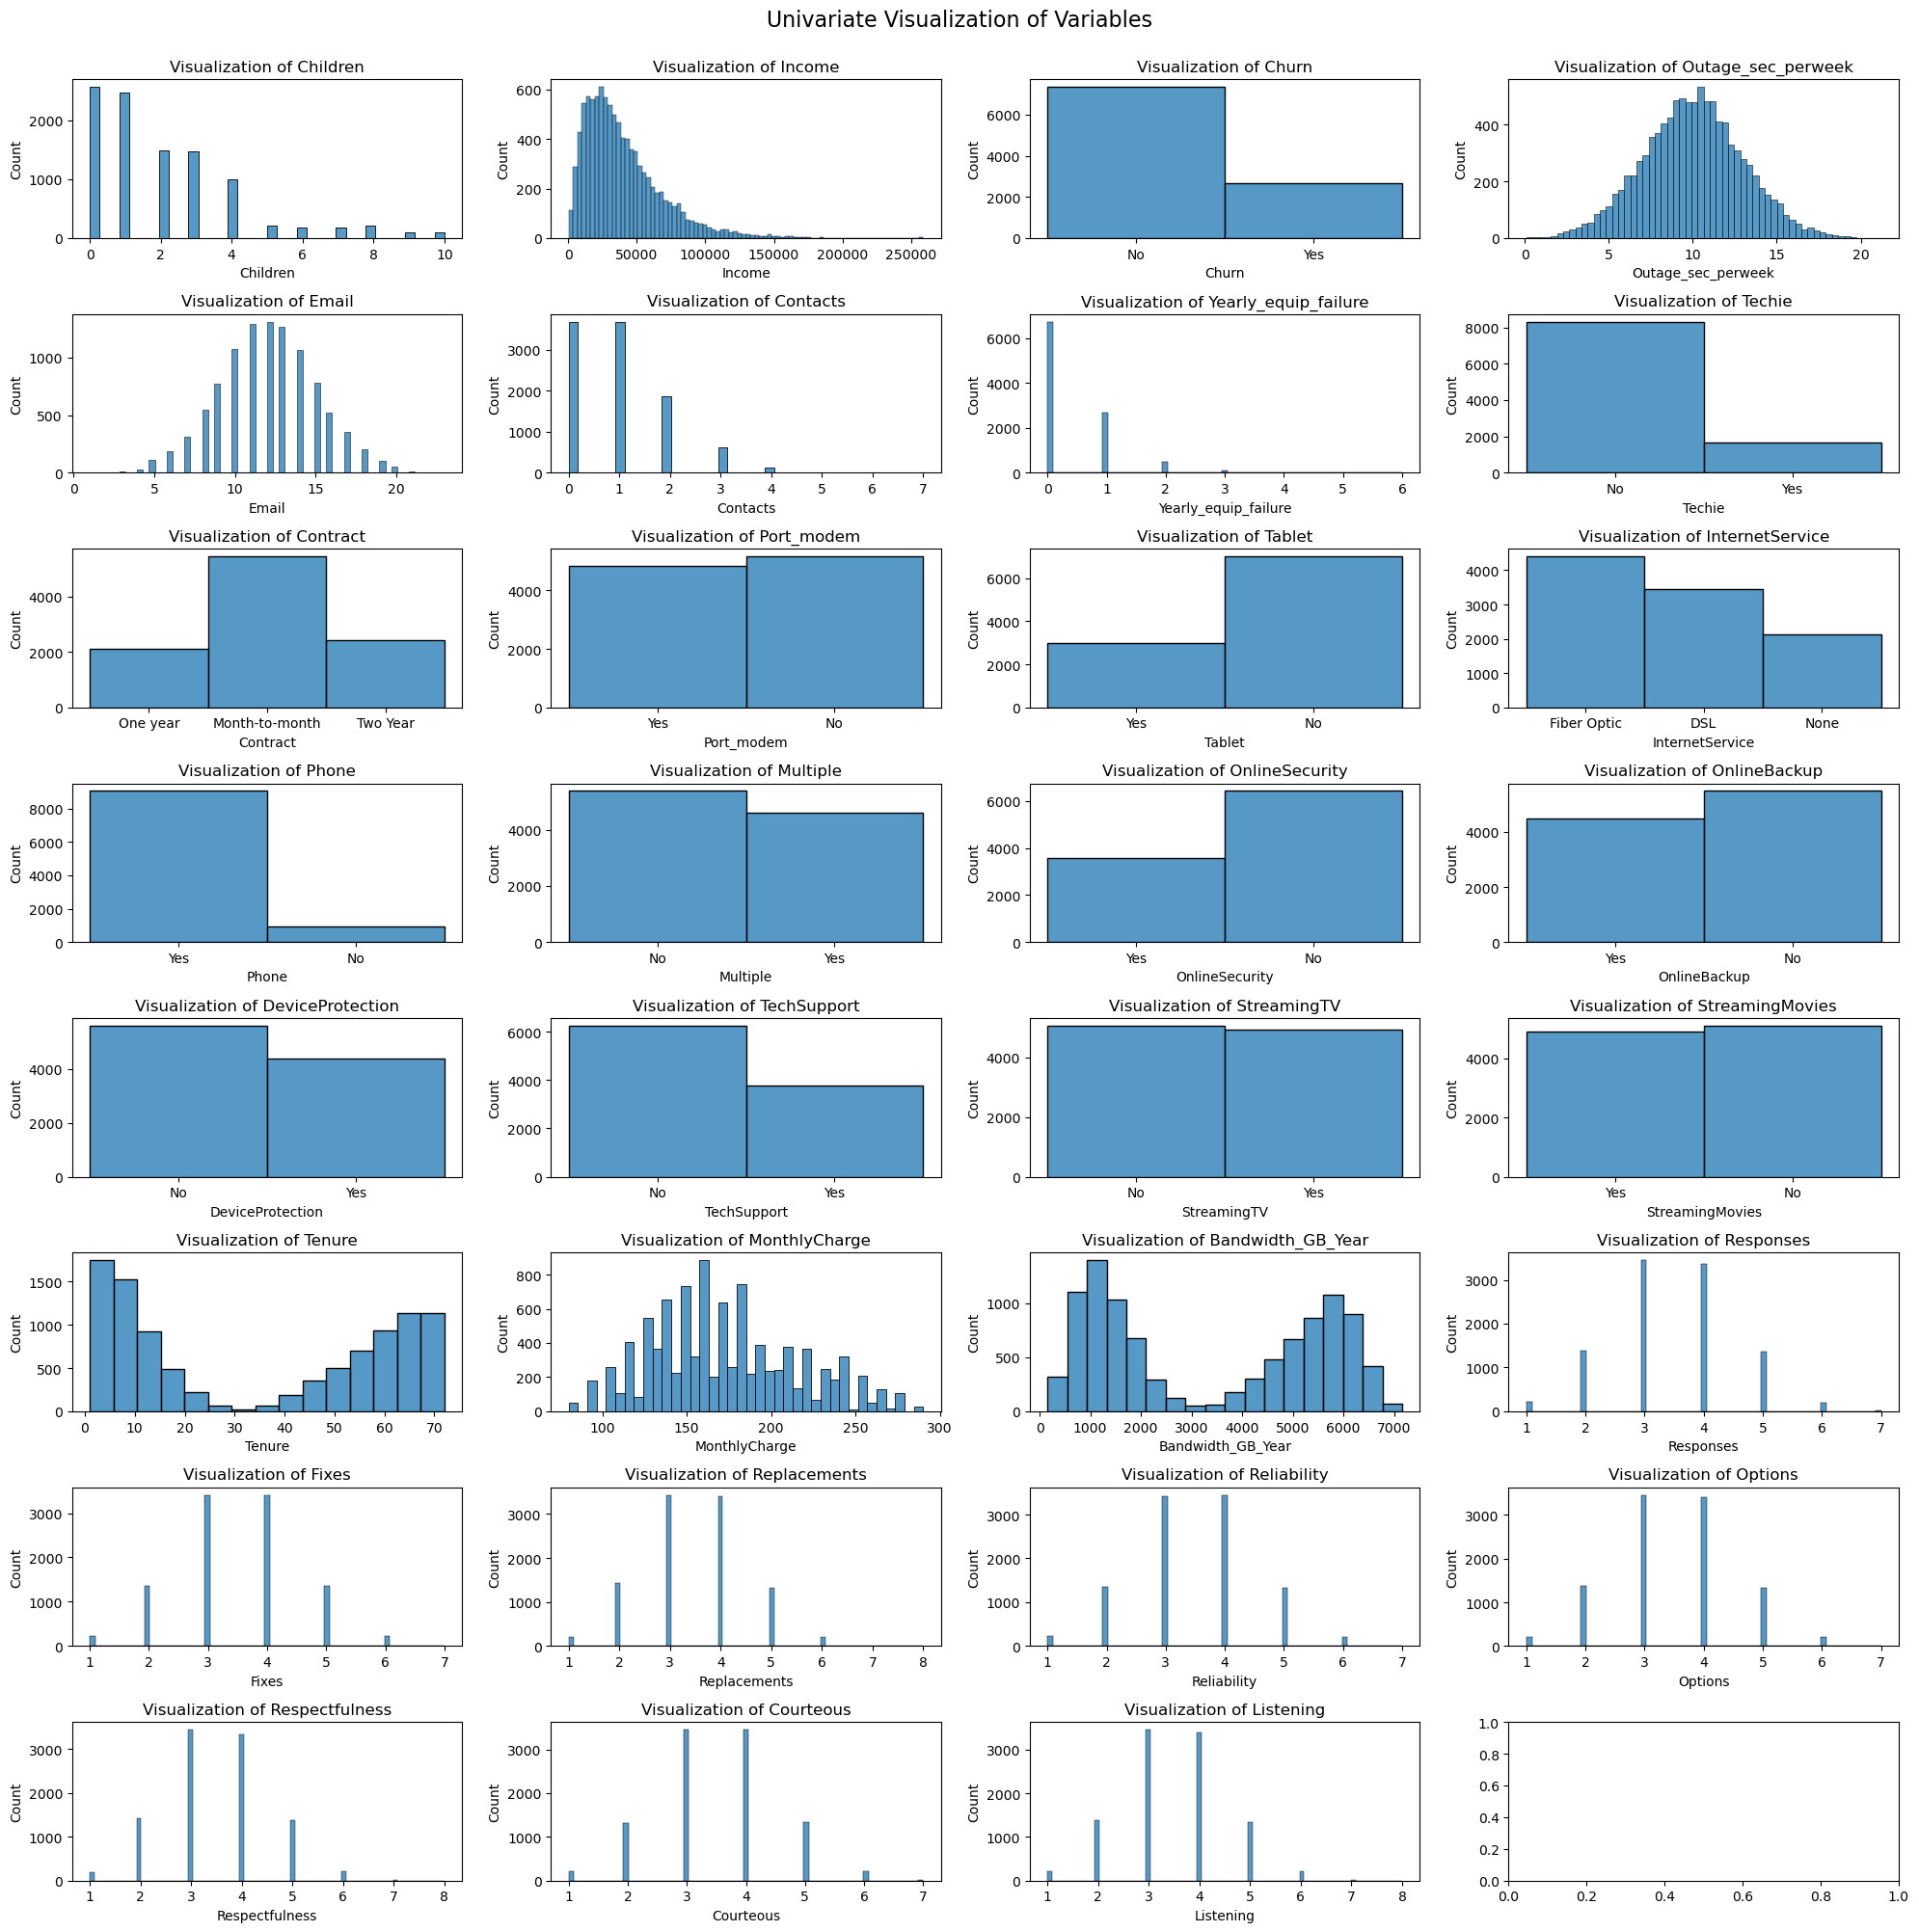

In [8]:
# UNIVARIATE VISUALIZATIONS

# Display the univariate visualization for all independent (predicting) variables and dependent (target) variable
fig_rows, fig_cols = (8, 4)
fig, axes = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(20, 20))
i = 0
for row in range(fig_rows):
    for col in range(fig_cols):
        try:
            sns.histplot(data=df, x=df.columns[i], ax=axes[row][col])
            axes[row][col].set_title(f"Visualization of {df.columns[i]}")
            i += 1
        except IndexError:
            break
plt.suptitle("Univariate Visualization of Variables", fontsize=16, y=1)
plt.tight_layout()
plt.show()

In [9]:
# Drop Tenure or Bandwidth_GB_Year because of multicollinearity from previous analysis
df = df.drop('Bandwidth_GB_Year', axis = 1)

In [10]:
# Reformat the columns to have 3 decimal places
df['Outage_sec_perweek'] = df.Outage_sec_perweek.round(3)
df['MonthlyCharge'] = df.MonthlyCharge.round(3)
df['Tenure'] = df.Tenure.round(3)

# Convert categorical variables to numerical format using one-hot encoding where needed
binary_columns = ['Churn','Techie','Port_modem','Tablet','Phone','Multiple','OnlineSecurity','OnlineBackup',
                 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
multiple_columns = ['Contract','InternetService']

# For binary columns, map "Yes" to 1 & "No" to 0
for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})
    
# For multiple category columns, use one-hot encoding
df = pd.get_dummies(df, columns=multiple_columns, drop_first=False)

# Convert only the one-hot encoded columns to integers
one_hot_columns = [col for col in df.columns if any (prefix in col for prefix in multiple_columns)]
for col in one_hot_columns:
    df[col] = df[col].astype(int)

In [11]:
# Extract the cleaned dataset
df.to_csv('churn2_clean.csv', index=False)

In [12]:
# PART IV: ANALYSIS

# Load dataset into pandas data frame
df = pd.read_csv(r'C:\Users\ashle\Downloads\Churn D209\churn2_clean.csv',keep_default_na=False)

In [13]:
# Set the predictor variables & target variable
y = df["Churn"]
X = df.drop(columns=["Churn"]) 

# Initialize the class and call fit_transform
skbest = SelectKBest(score_func=f_classif, k='all') 
X_new = skbest.fit_transform(X, y)

# Find p-values to select statistically significant features
p_values = pd.DataFrame({'Feature': X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
features_to_keep = p_values['Feature'][p_values['p_value'] < .05]

# Print the name of the selected features 
print("Selected Features:")
print(features_to_keep)

Selected Features:
18                  MonthlyCharge
17                         Tenure
16                StreamingMovies
27        Contract_Month-to-month
15                    StreamingTV
29              Contract_Two Year
28              Contract_One year
10                       Multiple
30            InternetService_DSL
6                          Techie
31    InternetService_Fiber Optic
13               DeviceProtection
12                   OnlineBackup
32           InternetService_None
9                           Phone
Name: Feature, dtype: object


In [14]:
# Perform cross-validation on the decision tree model
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
scores = cross_val_score(decision_tree, X_new, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average CV Score: ", scores.mean())

Cross-validation scores: [0.6065 0.67   0.8895 0.8715 0.81  ]
Average CV Score:  0.7695000000000001


In [15]:
# Split the data into X & y
y = df.Churn
X = df[['MonthlyCharge','Tenure','StreamingMovies','Contract_Month-to-month','StreamingTV','Contract_Two Year',
        'Contract_One year','Multiple','InternetService_DSL','Techie','InternetService_Fiber Optic','DeviceProtection',
        'OnlineBackup','InternetService_None','Phone']]

In [16]:
# Create the training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

In [17]:
# Save the training and testing sets as csv files
pd.DataFrame(X_train).to_csv('X_train2.csv')
pd.DataFrame(X_test).to_csv('X_test2.csv')
pd.DataFrame(y_train).to_csv('y_train2.csv')
pd.DataFrame(y_test).to_csv('y_test2.csv')

In [18]:
# HYPERPARAMETER TUNING

# Define the parameter grid 
param_grid = {'max_depth': [2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4]}

# Create an instance of the DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters using grid search
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 3}


In [19]:
# Fit the decision tree model using the best parameters found in the previous step
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Print the MSE, RMSE, & R-squared scores
print("Mean squared error for the model: ", mean_squared_error(y_test, y_pred))
print("Root mean squared error for the model: ", mean_squared_error(y_test, y_pred)**(1/2))
print("R-squared score for the model: ", r2_score(y_test, y_pred))

Mean squared error for the model:  0.1265
Root mean squared error for the model:  0.3556683848755748
R-squared score for the model:  0.3711442192494494


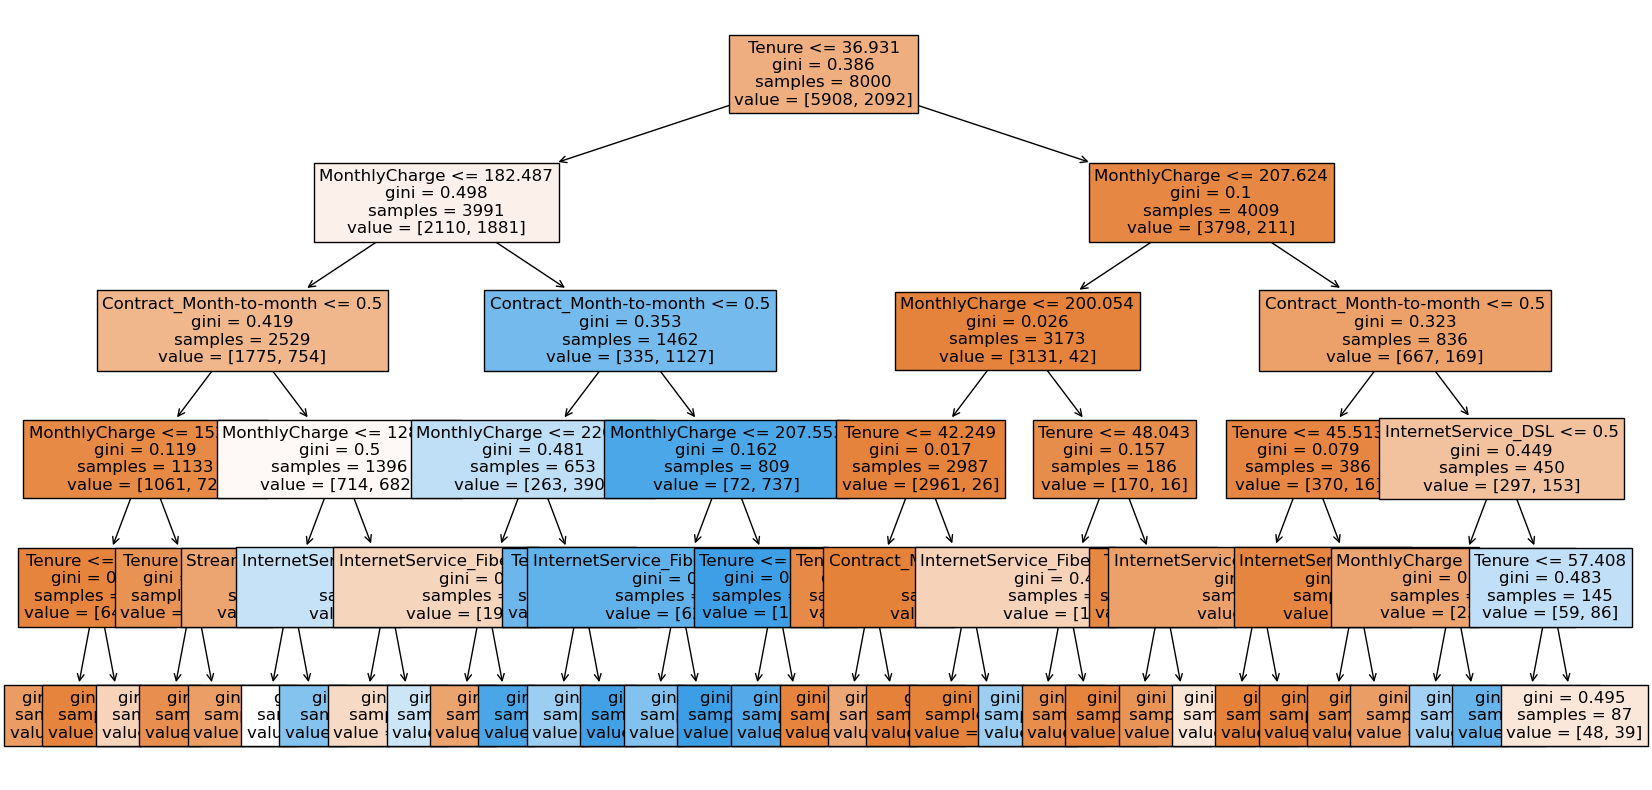

In [20]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(grid_search.best_estimator_, filled=True, fontsize=12, feature_names=X.columns.to_list())
plt.show()

In [21]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1442
           1       0.81      0.71      0.76       558

    accuracy                           0.87      2000
   macro avg       0.85      0.82      0.84      2000
weighted avg       0.87      0.87      0.87      2000



In [22]:
# Print the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1350   92]
 [ 161  397]]


In [23]:
# Predict the class labels of the training & testing data using the best model
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

# Calculate the accuracy of the best model 
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print the accuracy of the best model
print('The accuracy of the training model is: ', accuracy_train)
print('The accuracy of the model is: ', accuracy_test)

The accuracy of the training model is:  0.886375
The accuracy of the model is:  0.8735


In [24]:
# Compute the area under the Receiver Operating Characteristic Curve
auc_roc = roc_auc_score(y_test, y_pred)
print('AUC-ROC score: ', auc_roc)

AUC-ROC score:  0.8238346283288345


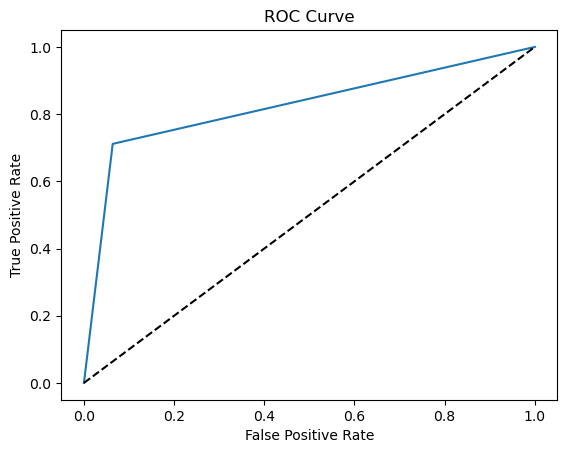

In [25]:
# Generate the plot for ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()